In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


# 1 - Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import Input
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

# 2 - Input data

<Axes: >

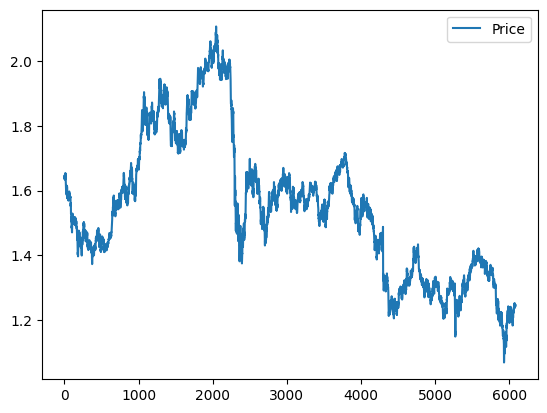

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2024_FINAL_REPORT/3.GBP_USD/GBP_USD.xlsx")
data.plot()

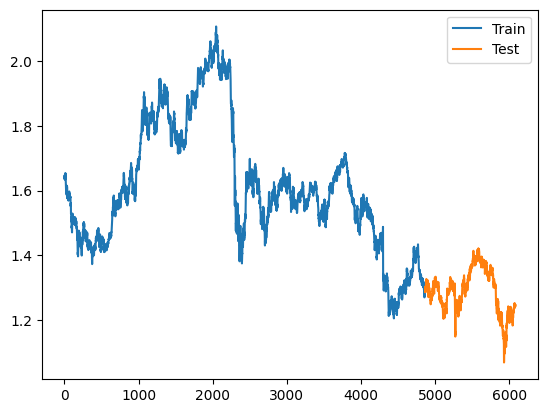

In [ ]:
data_train, data_test = train_test_split(data, test_size = 0.2, shuffle = False)
plt.plot([i for i in range(len(data_train))], data_train, label = "Train")
plt.plot([i for i in range(len(data_train), len(data_train) + len(data_test))], data_test, label = "Test")
plt.legend()
plt.show()

# 3 - Define function and class

In [ ]:
def transform(data, window_size=5):
    np_data = data.to_numpy()
    X, y = [], []
    for i in range(len(np_data) - window_size):
        X.append([j for j in np_data[i:i+window_size]])
        y.append(np_data[i+window_size])
    return np.array(X), np.array(y)

In [ ]:
def create_lstm_model(units):
    global window_size
    model = Sequential()
    model.add(Input(shape = (w, 1)))
    model.add(LSTM(units, activation = 'relu', return_sequences = True))
    model.add(LSTM(int(units/2), activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer = "adam", loss='mse')
    return model

# 4 - Using GridSearchCV to compare

In [ ]:
lstm_model = KerasRegressor(model = create_lstm_model, units = 50)

lstm_param_grid = {
    'units': [50, 100],
}

In [ ]:
window_size_values = [11, 22, 33]
lstm_best_models = []

for w in window_size_values:
    X, y = transform(data_train, w)
    window_size = w
    lstm_grid_search = GridSearchCV(estimator = lstm_model, param_grid = lstm_param_grid, cv = 60, verbose = 0, scoring = "neg_mean_squared_error")
    lstm_grid_search.fit(X, y)
    lstm_best_models.append((w, lstm_grid_search.best_params_, lstm_grid_search.best_score_))

lstm_df = pd.DataFrame(lstm_best_models, columns = ["window_size", "best_params", "best_score"])
lstm_df

150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.0293
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.7877
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.9114


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.0640
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.6437
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.6040
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.7948
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 1.0344
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.9042
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.9511
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.0646
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.9299
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 1.0327
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step
1

,window_size,best_params,best_score
0,11,{'units': 100},-0.004129
1,22,{'units': 100},-0.002990
2,33,{'units': 100},-0.004225


Sau khi chạy xong GridSearch ta có kết quả như sau:

In [ ]:
best_result = lstm_df.loc[lstm_df["best_score"].idxmax()]

In [ ]:
print("LSTM best result: ")
print("_", best_result["window_size"])
print("_", best_result["best_params"])
print("_", best_result["best_score"])

LSTM best result: 
_ 22
_ {'units': 100}
_ -0.0029903358745546733


#5 - Test

In [ ]:
X_train, y_train = transform(data_train, best_result["window_size"])
X_test, y_test = transform(data_test, best_result["window_size"])

In [ ]:
model = Sequential()
model.add(Input(shape = (best_result["window_size"], 1)))
model.add(LSTM(best_result["best_params"]["units"], activation = 'relu', return_sequences = True))
model.add(LSTM(int(best_result["best_params"]["units"]/2), activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = "adam", loss='mse')
model.summary()
model.fit(X_train, y_train, epochs = 100, verbose = 0)

Model: "sequential_363"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_726 (LSTM)                      │ (None, 22, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_727 (LSTM)                      │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_363 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_363 (Dense)                    │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
print("LSTM mse score: ", mse(y_test.ravel(), y_pred))
print("LSTM mape score: ", mape(y_test.ravel(), y_pred))

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
LSTM mse score:  0.00029007632549620795
LSTM mape score:  0.008234918892539944


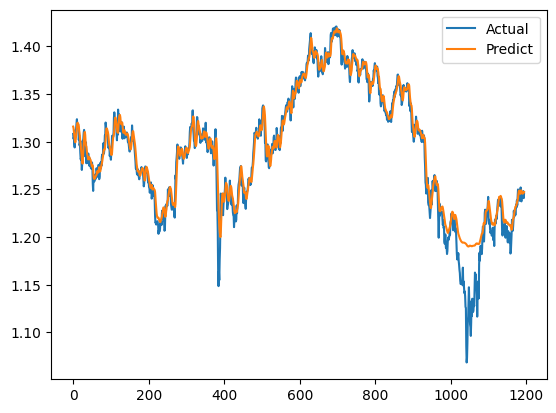

In [ ]:
plt.plot(y_test, label = "Actual")
plt.plot(y_pred, label = "Predict")
plt.legend()
plt.show()

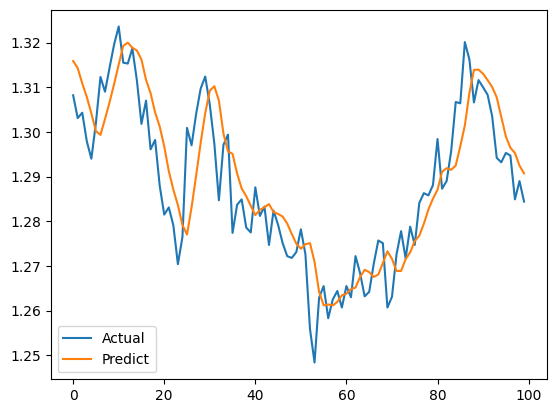

In [ ]:
plt.plot(y_test[:100], label = "Actual")
plt.plot(y_pred[:100], label = "Predict")
plt.legend()
plt.show()